In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import numpy as np
import pandas as pd
import scipy 
import scipy.stats
import random
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Data Preparation

In [2]:
nyc = pd.read_csv('~/Downloads/PYTN041ONL/Dataset/nyc-rolling-sales.csv')
nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
nyc.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [4]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
nyc.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [6]:
nyc.shape

(84548, 22)

In [7]:
nyc['BOROUGH'][nyc['BOROUGH'] == 1] = 'Manhattan'
nyc['BOROUGH'][nyc['BOROUGH'] == 2] = 'Bronx'
nyc['BOROUGH'][nyc['BOROUGH'] == 3] = 'Brooklyn'
nyc['BOROUGH'][nyc['BOROUGH'] == 4] = 'Queens'
nyc['BOROUGH'][nyc['BOROUGH'] == 5] = 'Staten Island'

In [8]:
nyc.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [9]:
category = nyc.select_dtypes(include=['object'])
category.head().transpose()

,0,1,2,3,4
BOROUGH,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan
NEIGHBORHOOD,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY
BUILDING CLASS CATEGORY,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS
TAX CLASS AT PRESENT,2A,2,2,2B,2A
EASE-MENT,,,,,
BUILDING CLASS AT PRESENT,C2,C7,C7,C4,C2
ADDRESS,153 AVENUE B,234 EAST 4TH STREET,197 EAST 3RD STREET,154 EAST 7TH STREET,301 EAST 10TH STREET
APARTMENT NUMBER,,,,,
LAND SQUARE FEET,1633,4616,2212,2272,2369
GROSS SQUARE FEET,6440,18690,7803,6794,4615


In [10]:
category.describe().transpose()

,count,unique,top,freq
BOROUGH,84548,5,Queens,26736
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235
TAX CLASS AT PRESENT,84548,11,1,38633
EASE-MENT,84548,1,,84548
BUILDING CLASS AT PRESENT,84548,167,D4,12663
ADDRESS,84548,67563,131-05 40TH ROAD,210
APARTMENT NUMBER,84548,3989,,65496
LAND SQUARE FEET,84548,6062,-,26252
GROSS SQUARE FEET,84548,5691,-,27612


In [11]:
del nyc['EASE-MENT']
del nyc['Unnamed: 0']

In [12]:
nyc['BOROUGH'] = nyc['BOROUGH'].astype('category')
nyc['SALE PRICE'] = pd.to_numeric(nyc['SALE PRICE'], errors='coerce')
nyc['LAND SQUARE FEET'] = pd.to_numeric(nyc['LAND SQUARE FEET'], errors='coerce')
nyc['GROSS SQUARE FEET']= pd.to_numeric(nyc['GROSS SQUARE FEET'], errors='coerce')
nyc['SALE DATE'] = pd.to_datetime(nyc['SALE DATE'], errors='coerce')
nyc['TAX CLASS AT TIME OF SALE'] = nyc['TAX CLASS AT TIME OF SALE'].astype('category')
nyc['TAX CLASS AT PRESENT'] = nyc['TAX CLASS AT PRESENT'].astype('category')
nyc['NEIGHBORHOOD'] = nyc['NEIGHBORHOOD'].astype('category')
nyc['BUILDING CLASS CATEGORY'] = nyc['BUILDING CLASS CATEGORY'].astype('category')
nyc['BUILDING CLASS AT PRESENT'] = nyc['BUILDING CLASS AT PRESENT'].astype('category')
nyc['BUILDING CLASS AT TIME OF SALE'] = nyc['BUILDING CLASS AT TIME OF SALE'].astype('category')

In [13]:
nyc = nyc.drop_duplicates(nyc.columns, keep='last')
sum(nyc.duplicated(nyc.columns))

0

In [14]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  category      
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  category      
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

In [15]:
nyc.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,5.772900e+04,5.639800e+04,83783.000000,6.960700e+04
mean,4242.903155,376.137415,10733.236575,1.999976,0.183677,2.213504,3.854481e+03,3.894416e+03,1789.814318,1.280703e+06
std,3568.789482,658.021286,1289.764300,16.569118,8.576582,18.777727,4.154737e+04,3.483726e+04,536.565051,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.643000e+03,1.040000e+03,1920.000000,2.300000e+05
50%,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1940.000000,5.330000e+05
75%,6295.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.552000e+03,1965.000000,9.500000e+05
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [16]:
sales = nyc[nyc['SALE PRICE'].notnull()]
len(sales)

69607

In [17]:
sales.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,4.844900e+04,4.790000e+04,69607.000000,6.960700e+04
mean,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.544802e+03,3.528707e+03,1799.852184,1.280703e+06
std,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.973875e+04,2.920564e+04,520.099311,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.425000e+03,8.160000e+02,1920.000000,2.300000e+05
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1938.000000,5.330000e+05
75%,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.100000e+03,2.508000e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [18]:
print(nyc[(nyc['LAND SQUARE FEET'].isnull()) & (nyc['GROSS SQUARE FEET'].notnull())].shape)
print(nyc[(nyc['LAND SQUARE FEET'].notnull()) & (nyc['GROSS SQUARE FEET'].isnull())].shape)

(5, 20)
(1336, 20)


In [19]:
nyc ['LAND SQUARE FEET'] = nyc ['LAND SQUARE FEET'].mask((nyc['LAND SQUARE FEET'].isnull()) & (nyc['GROSS SQUARE FEET'].notnull()), nyc['GROSS SQUARE FEET'])
nyc ['GROSS SQUARE FEET'] = nyc ['GROSS SQUARE FEET'].mask((nyc['LAND SQUARE FEET'].notnull()) & (nyc['GROSS SQUARE FEET'].isnull()), nyc['LAND SQUARE FEET'])                                                         

In [20]:
print(sum(nyc.duplicated()))

0


In [21]:
nyc[nyc.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [22]:
nyc.drop_duplicates(inplace=True)
print(sum(nyc.duplicated()))

0


In [23]:
sales.drop_duplicates(inplace=True)
print(sum(sales.duplicated()))

0


# Exploratory Data analysis

In [24]:
nyc[nyc['COMMERCIAL UNITS']==0].describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


In [25]:
nyc['BOROUGH'].value_counts()

Queens           26548
Brooklyn         23843
Manhattan        18102
Staten Island     8296
Bronx             6994
Name: BOROUGH, dtype: int64

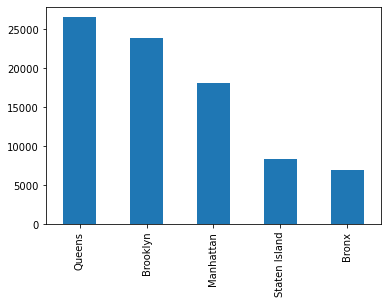

In [26]:
nyc['BOROUGH'].value_counts().plot.bar()

In [27]:
# the highest number of building located in Queens

# Mean, Median, Mode

In [28]:
nyc['RESIDENTIAL UNITS'].mean()

1.9999761288089468

In [29]:
nyc['COMMERCIAL UNITS'].mean()

0.18367687955790554

In [30]:
nyc ['TOTAL UNITS'].mean()

2.213503932778726

In [31]:
nyc ['SALE PRICE'].mean()

1280703.0003016938

In [32]:
nyc['RESIDENTIAL UNITS'].median()

1.0

In [33]:
nyc['COMMERCIAL UNITS'].median()

0.0

In [34]:
nyc ['TOTAL UNITS'].median()

1.0

In [35]:
nyc ['SALE PRICE'].median()

533000.0

In [36]:
nyc[nyc['BOROUGH'] == 'Queens'].mean()

BLOCK                  6630.747589
LOT                     230.493672
ZIP CODE              11300.423572
RESIDENTIAL UNITS         1.687283
COMMERCIAL UNITS          0.190410
TOTAL UNITS               1.908920
LAND SQUARE FEET       4265.245190
GROSS SQUARE FEET      3345.841693
YEAR BUILT             1852.259982
SALE PRICE           738882.658392
dtype: float64

In [37]:
nyc[nyc['BOROUGH'] == 'Queens'].median()

BLOCK                  5900.0
LOT                      40.0
ZIP CODE              11375.0
RESIDENTIAL UNITS         1.0
COMMERCIAL UNITS          0.0
TOTAL UNITS               1.0
LAND SQUARE FEET       2768.0
GROSS SQUARE FEET      1728.0
YEAR BUILT             1945.0
SALE PRICE           495000.0
dtype: float64

In [38]:
nyc[nyc['BOROUGH'] == 'Queens'].mode()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,A1,131-05 40TH ROAD,,11354,1,0,1,4000.0,2000.0,1920,1,A1,10.0,2016-11-10


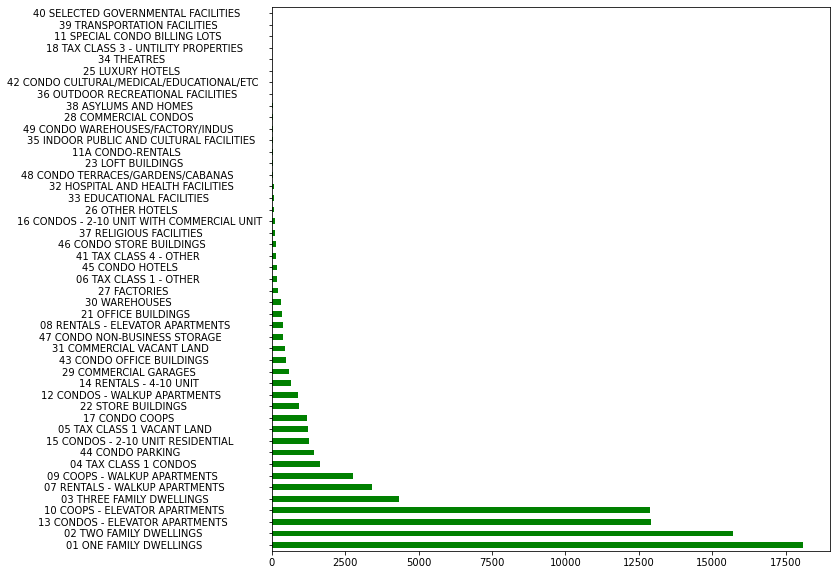

In [39]:
nyc['BUILDING CLASS CATEGORY'].value_counts().plot(kind='barh',figsize =(10, 10), color = 'green')

In [40]:
nyc['NEIGHBORHOOD'].value_counts()

FLUSHING-NORTH              3058
UPPER EAST SIDE (59-79)     1729
UPPER EAST SIDE (79-96)     1582
BEDFORD STUYVESANT          1429
UPPER WEST SIDE (59-79)     1415
                            ... 
VAN CORTLANDT PARK             2
PELHAM BAY                     1
BRONX PARK                     1
CITY ISLAND-PELHAM STRIP       1
EAST RIVER                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

In [41]:
#skewness of SalePrice
sales['SALE PRICE'].skew()

123.94313183709575

In [42]:
sales[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,30550
0,0,17583
2,2,13021
3,3,4478
4,4,1275
...,...,...
114,136,1
113,135,1
112,132,1
111,130,1


In [43]:
Y = nyc['SALE PRICE']
X = nyc.drop('SALE PRICE', axis=1)

X.shape , Y.shape

((83783, 19), (83783,))

In [44]:
model = LinearRegression ()

In [45]:
from sklearn.model_selection import train_test_split

features = sales.drop(["SALE PRICE"], axis = 1)
target = sales["SALE PRICE"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [46]:
X_train ,X_test, Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state =34)

In [47]:
X_train.shape , Y_train.shape

((58648, 19), (58648,))

In [48]:
X_test.shape , Y_test.shape

((25135, 19), (25135,))

In [49]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  category      
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  category      
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, y_pred) ** 0.5)

ValueError: could not convert string to float: 'Bronx'

In [51]:
# udah coba ubah sale price ke numeric tapi ga berhasil juga :(